<a href="https://colab.research.google.com/github/elakkiya-02/ML_Crash_Course/blob/main/BinaryClassificationWithKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [3]:
#california housing data set as provided
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")
train_df = train_df.reindex(np.random.permutation(train_df.index))

In [4]:
#Normalization with Z-score formula
#z-score = (x-mean)/stdev
#z-score for train set
train_df_mean = train_df.mean()
train_df_std = train_df.std()
#to a pandas df
train_df_norm = (train_df - train_df_mean)/train_df_std

In [5]:
train_df_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
10954,-0.662235,1.719322,-0.920744,-0.165905,-0.257203,-0.396892,-0.338660,-0.179167,-0.450071
12305,-0.966449,1.387133,1.144889,-1.172352,-1.229921,-1.141761,-1.254085,-1.131237,-1.205349
15018,-1.340483,1.948579,-1.000192,-0.237008,-0.302280,-0.283637,-0.343862,-0.438475,-1.164826
7864,0.579557,-0.671500,0.509310,-0.212695,0.141374,0.046544,0.189269,-0.442353,-0.137958
14121,-1.250715,2.491310,-1.159087,0.035476,0.207804,-0.064097,-0.086398,-0.447384,-1.156204


In [6]:
#z-score for test_df
test_df_mean = test_df.mean()
test_df_std = test_df.std()
#to a pandas df
test_df_norm = (test_df - test_df_mean)/test_df_std

In [7]:
test_df_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.233523,0.814497,-0.146975,0.596319,0.315284,0.130224,0.317681,1.510494,1.227494
1,0.646236,-0.645823,1.127377,-0.505466,-0.529167,-0.576200,-0.582646,-0.112305,-0.259427
2,0.891858,-0.871210,-0.146975,0.459002,-0.055216,0.078795,0.013924,1.070971,0.571551
3,0.616160,-0.852428,-0.067328,-1.174887,-1.238892,-1.313675,-1.310570,1.255656,1.097543
4,-0.040503,0.326159,-0.784152,-0.630257,-0.687953,-0.536415,-0.692108,-0.469003,-1.097477


In [8]:
train_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
#median_house_value 75th percentile >>265000 
threshold = 265000
#a new column with values to 0 and 1 for median_house_value
train_df_norm["high_median_house_value"] = (train_df["median_house_value"] > threshold).astype(float)
test_df_norm["high_median_house_value"] = (test_df["median_house_value"]>threshold).astype(float)

print(train_df_norm.head())
print(test_df_norm.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
10954  -0.662235  1.719322           -0.920744    -0.165905       -0.257203   
12305  -0.966449  1.387133            1.144889    -1.172352       -1.229921   
15018  -1.340483  1.948579           -1.000192    -0.237008       -0.302280   
7864    0.579557 -0.671500            0.509310    -0.212695        0.141374   
14121  -1.250715  2.491310           -1.159087     0.035476        0.207804   

       population  households  median_income  median_house_value  \
10954   -0.396892   -0.338660      -0.179167           -0.450071   
12305   -1.141761   -1.254085      -1.131237           -1.205349   
15018   -0.283637   -0.343862      -0.438475           -1.164826   
7864     0.046544    0.189269      -0.442353           -0.137958   
14121   -0.064097   -0.086398      -0.447384           -1.156204   

       high_median_house_value  
10954                      0.0  
12305                      0.0  
15018            

Handling continuous floating point features with feature columns

In [10]:
#to hold all the feature columns
feature_columns = []
#median_income column
median_income = tf.feature_column.numeric_column("median_income")
feature_columns.append(median_income)
#total_rooms
total_rooms = tf.feature_column.numeric_column("total_rooms")
feature_columns.append(total_rooms)

In [11]:
#list of feature columns into a layer
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [12]:
feature_layer(dict(train_df_norm))

<tf.Tensor: shape=(17000, 2), dtype=float32, numpy=
array([[-0.17916669, -0.16590513],
       [-1.1312374 , -1.1723516 ],
       [-0.43847457, -0.23700778],
       ...,
       [-0.13084781,  0.5831956 ],
       [ 0.04644373, -0.24388868],
       [ 0.6995872 ,  0.38089713]], dtype=float32)>

In [13]:
train_df_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,high_median_house_value
10954,-0.662235,1.719322,-0.920744,-0.165905,-0.257203,-0.396892,-0.338660,-0.179167,-0.450071,0.0
12305,-0.966449,1.387133,1.144889,-1.172352,-1.229921,-1.141761,-1.254085,-1.131237,-1.205349,0.0
15018,-1.340483,1.948579,-1.000192,-0.237008,-0.302280,-0.283637,-0.343862,-0.438475,-1.164826,0.0
7864,0.579557,-0.671500,0.509310,-0.212695,0.141374,0.046544,0.189269,-0.442353,-0.137958,0.0
14121,-1.250715,2.491310,-1.159087,0.035476,0.207804,-0.064097,-0.086398,-0.447384,-1.156204,0.0


In [14]:
#to create a model with feature_layer
#simple sequential model
#add the feature layer
#add the dense layer
#compile the model optimize, loss function, metrics

def create_model(lr, feature_layer, metrics):
  model = tf.keras.models.Sequential()
  model.add(feature_layer)
  #moving the regrssion value through a sigmoid function
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,), 
                                  activation = tf.sigmoid))
  model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = lr),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = metrics)
  return model

In [15]:
#features
#labels
#fit
#seperate epoch
#isolate classification metric for each epoch
#metric
def train_model(model, dataset, epochs, label_name, batch_size=None, shuffle=True):
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs,
                      shuffle=shuffle)
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist


In [16]:
def plot_loss_curve(epochs, hist, list_of_metrics):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Metric")

  for i in list_of_metrics:
    x = hist[i]
    plt.plot(epochs[1:], x[1:], label = i)
  
  plt.legend()

In [17]:
#hyperparameters
lr = 0.001
epochs = 20
batch_size = 1000
label_name = "high_median_house_value"
classification_threshold = 0.35
metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold = classification_threshold),]


In [18]:
#creating the model with seq_model
seq_model = create_model(lr, feature_layer, metrics)

In [19]:
#training the model
epochs, hist = train_model(seq_model, train_df_norm, epochs, label_name, 
                           batch_size)


Epoch 1/20
17/17 [==============================] - 1s 2ms/step - loss: 0.6070 - accuracy: 0.5279
Epoch 2/20
17/17 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.5364
Epoch 3/20
17/17 [==============================] - 0s 2ms/step - loss: 0.5929 - accuracy: 0.5438
Epoch 4/20
17/17 [==============================] - 0s 2ms/step - loss: 0.5866 - accuracy: 0.5514
Epoch 5/20
17/17 [==============================] - 0s 3ms/step - loss: 0.5805 - accuracy: 0.5572
Epoch 6/20
17/17 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.5632
Epoch 7/20
17/17 [==============================] - 0s 3ms/step - loss: 0.5685 - accuracy: 0.5710
Epoch 8/20
17/17 [==============================] - 0s 3ms/step - loss: 0.5626 - accuracy: 0.5781
Epoch 9/20
17/17 [==============================] - 0s 3ms/step - loss: 0.5569 - accuracy: 0.5855
Epoch 10/20
17/17 [==============================] - 0s 4ms/step - loss: 0.5513 - accuracy: 0.5919
Epoch 11/20
17/17 [

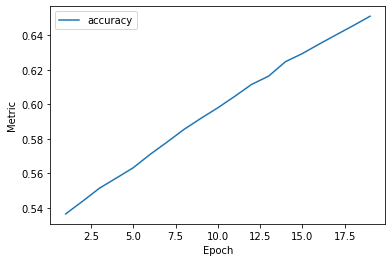

In [20]:
#plotting the accuracy across every epoch
plot_metrics_list = ['accuracy']
plot_loss_curve(epochs, hist, plot_metrics_list)

In [21]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_features (DenseFeatur  multiple                 0         
 es)                                                             
                                                                 
 dense (Dense)               multiple                  3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [22]:
#Evaluation against test set
features = {name:np.array(value) for name, value in test_df_norm.items()}
label = np.array(features.pop(label_name))

In [23]:
seq_model.evaluate(x=features, y=label, batch_size = batch_size)

3/3 [==============================] - 0s 10ms/step - loss: 0.5065 - accuracy: 0.6480


[0.5065352320671082, 0.6480000019073486]

In [24]:
#Adding Precision and recall as metrics

lr = 0.001
epochs = 20
batch_size = 100
classification_threshold = 0.35
label_name = "high_median_house_value"
metrics = [tf.keras.metrics.BinaryAccuracy(name ='accuracy',
                                           threshold = classification_threshold),
           tf.keras.metrics.Precision(name = 'precision',
                                      thresholds = classification_threshold),
           tf.keras.metrics.Recall(name = 'recall',
                                   thresholds = classification_threshold)
           ]

Epoch 1/20
170/170 [==============================] - 2s 4ms/step - loss: 0.7880 - accuracy: 0.3016 - precision: 0.2340 - recall: 0.7895
Epoch 2/20
170/170 [==============================] - 1s 5ms/step - loss: 0.6822 - accuracy: 0.3339 - precision: 0.2465 - recall: 0.8100
Epoch 3/20
170/170 [==============================] - 1s 5ms/step - loss: 0.5967 - accuracy: 0.4247 - precision: 0.2764 - recall: 0.8050
Epoch 4/20
170/170 [==============================] - 1s 5ms/step - loss: 0.5287 - accuracy: 0.6204 - precision: 0.3727 - recall: 0.7608
Epoch 5/20
170/170 [==============================] - 1s 4ms/step - loss: 0.4795 - accuracy: 0.7399 - precision: 0.4858 - recall: 0.6988
Epoch 6/20
170/170 [==============================] - 1s 5ms/step - loss: 0.4457 - accuracy: 0.7846 - precision: 0.5588 - recall: 0.6560
Epoch 7/20
170/170 [==============================] - 1s 5ms/step - loss: 0.4242 - accuracy: 0.8019 - precision: 0.5970 - recall: 0.6374
Epoch 8/20
170/170 [=====================

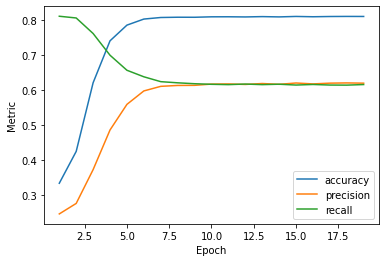

In [25]:
#Model with a list a metrics
seq_model = create_model(lr, feature_layer, metrics)

epochs, hist = train_model(seq_model, train_df_norm, epochs, label_name, batch_size)

plot_metric_list = ['accuracy', 'precision','recall']
plot_loss_curve(epochs, hist, plot_metric_list)

With the graph above, we cannot decide just precision and recall because they are conflicted. So we are adding AUC as another metric
to evaluate the model's overall performance

Epoch 1/20
170/170 [==============================] - 2s 6ms/step - loss: 1.0948 - auc: 0.1803
Epoch 2/20
170/170 [==============================] - 1s 7ms/step - loss: 0.9860 - auc: 0.1890
Epoch 3/20
170/170 [==============================] - 0s 3ms/step - loss: 0.8895 - auc: 0.1981
Epoch 4/20
170/170 [==============================] - 0s 2ms/step - loss: 0.8057 - auc: 0.2081
Epoch 5/20
170/170 [==============================] - 0s 2ms/step - loss: 0.7327 - auc: 0.2239
Epoch 6/20
170/170 [==============================] - 0s 2ms/step - loss: 0.6708 - auc: 0.2495
Epoch 7/20
170/170 [==============================] - 0s 3ms/step - loss: 0.6192 - auc: 0.3048
Epoch 8/20
170/170 [==============================] - 0s 2ms/step - loss: 0.5753 - auc: 0.4611
Epoch 9/20
170/170 [==============================] - 0s 3ms/step - loss: 0.5369 - auc: 0.7232
Epoch 10/20
170/170 [==============================] - 0s 3ms/step - loss: 0.5043 - auc: 0.7996
Epoch 11/20
170/170 [============================

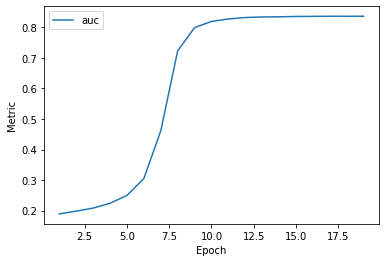

In [26]:
#AUC curve
#Hyperparameters
lr = 0.001
epochs = 20
batch_size = 100
label_name ="high_median_house_value"

metrics = tf.keras.metrics.AUC(name = "auc", num_thresholds = 100)

seq_model = create_model(lr, feature_layer, metrics)
epochs, hist = train_model(seq_model, train_df_norm, epochs, label_name, batch_size)
plot_metrics_list = ['auc']
plot_loss_curve(epochs, hist, plot_metrics_list)

ROC is a probabality curve
and AUC measure the degree or seperability ie, how better the model is in distinguishing between classes
